Application of data analytic techniques using SEEK job market data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

PART 1: DATA PREPARATION AND PREPROCESSING

In [2]:
# locally read csv to dataframe
df = pd.read_csv("data.csv")

C:\Users\amic7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3266: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Describe the dataset
df.info()

print('')

print("Within the dataset there are", df.shape[0], "rows(records) and", df.shape[1], "columns." )

# Print first ten rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB

Within the dataset there are 318477 rows(records) and 13 columns.


Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   
5  37404307  Business Banking Contact Centre Specialist, Ni...   
6  37404355               Casual Café All-rounder in Semaphore   
7  37404350           Casual Café All-rounder in Woolloongabba   
8  37404301                                       Telemarketer   
9  37404286                       Casual Dish Hand in Brighton   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
5  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
6                                      Jora Local  2018-10-07T00:00:00.000Z   
7                                      Jora Local  2018-10-07T00:00:00.000Z   
8                            Reventon Investments  2018-10-07T00:00:00.000Z   
9                                      Jora Local  2018-10-07T00:00:00.000Z   

                  Location                             Area  \
0                   Sydney      North West & Hills District   
1    Richmond & Hawkesbury                              NaN   
2                 Brisbane              CBD & Inner Suburbs   
3  Gosford & Central Coast                              NaN   
4                   Sydney            Ryde & Macquarie Park   
5                   Sydney            Ryde & Macquarie Park   
6                 Adelaide                              NaN   
7                 Brisbane              CBD & Inner Suburbs   
8                Melbourne              CBD & Inner Suburbs   
9                Melbourne  Bayside & South Eastern Suburbs   

                   Classification               SubClassification  \
0      Retail & Consumer Products               Retail Assistants   
1      Retail & Consumer Products               Retail Assistants   
2      Retail & Consumer Products               Retail Assistants   
3      Retail & Consumer Products               Retail Assistants   
4  Call Centre & Customer Service                 Sales - Inbound   
5  Call Centre & Customer Service  Customer Service - Call Centre   
6           Hospitality & Tourism                   Waiting Staff   
7           Hospitality & Tourism                   Waiting Staff   
8  Call Centre & Customer Service                Sales - Outbound   
9           Hospitality & Tourism        Kitchen & Sandwich Hands   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   
5  We are seeking highly articulate, enthusiastic...             NaN   
6  A cafe/restaurant in Semaphore is seeking a ca...             NaN   
7  A cafe in Woolloongabba is seeking a casual Ca...             NaN   
8  Market leading investment & financial services...             NaN   
9  A restaurant in Brighton is seeking a casual D...             NaN   

   LowestSalary  HighestSalary JobType  
0             0             30     NaN  
1             0             30     NaN  
2             0             30     NaN  
3

Which period does it cover? How many different dates have job postings? 

In [4]:
# Sort values in ascending order
df = df.sort_values(by = 'Date')

# Converts the column data type to date type and extracts the date part from it
df['Date'] = pd.to_datetime(df['Date']).dt.date

firstDate = df['Date'].iloc[0] # first element 

lastDate = df['Date'].iloc[-1] # last element 

# Determine the number of unique groups
datesCount = df.groupby(by = 'Date').ngroups

print('The dataset covers the period from', firstDate, 'to', lastDate, 'and', datesCount, 'different dates have job postings')

The dataset covers the period from 2018-10-01 to 2019-03-13 and 163 different dates have job postings


How many locations does the dataset have? Which location has the most job postings?

In [5]:
# Count the number of unique locations in the DataFrame
num_of_locations = df.groupby(by = 'Location').ngroups

# The reset_index() method in pandas is used to reset the index of a DataFrame or Series and, optionally, 
# add a new default integer-based index.The reset_index() method helps you restore a clean, sequential index.

# Count the total number of jobs in each location and assign the results to a DataFrame
loc_df = df.groupby('Location').size().reset_index(name='TotalJobs')

# Sort values in ascending order
sortValues = loc_df.sort_values('TotalJobs')

# Extract the last row to a variable
lastrow = sortValues.tail(1)

print('The dataset consists of', num_of_locations, 'locations, and the location with the most job postings is:')

print()

print(lastrow)

The dataset consists of 65 locations, and the location with the most job postings is:

   Location  TotalJobs
54   Sydney      60765


How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [6]:
# Count the number of unique job sectors in the DataFrame
num_of_jobsect = df.groupby(by = 'Classification').ngroups

print('Job Sectors', num_of_jobsect)

# Count the total number of jobs in each job sector, reset the index of a DataFrame or Series and, optionally, 
# add a new default integer-based index and assign the results to a DataFrame
jobsect_df = df.groupby('Classification').size().reset_index(name='TotalJobs')

df_sorted = jobsect_df.sort_values(by='TotalJobs', ascending=True)

# Print
df_sorted


Job Sectors 30


Classification  TotalJobs
27                         Self Employment         93
2                Advertising, Arts & Media        833
4                 CEO & General Management        844
12         Farming, Animals & Conservation        882
26                    Science & Technology        905
28                      Sport & Recreation        984
8                    Consulting & Strategy       1206
18              Insurance & Superannuation       1474
9                    Design & Architecture       1811
23                  Real Estate & Property       3614
21              Marketing & Communications       3968
5           Call Centre & Customer Service       3971
16           Human Resources & Recruitment       4144
19                                   Legal       4237
6         Community Services & Development       4485
3             Banking & Financial Services       4633
22              Mining, Resources & Energy       6288
11                             Engineering       6458
13                    Government & Defence       7443
24              Retail & Consumer Products       8041
25                                   Sales       8119
7                             Construction       8372
10                    Education & Training       9280
0                               Accounting       9368
1          Administration & Office Support      10020
20    Manufacturing, Transport & Logistics      12376
15                   Hospitality & Tourism      15523
14                    Healthcare & Medical      17085
29                       Trades & Services      17976
17  Information & Communication Technology      22796

Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [7]:
# Count the number of job postings for each sub sector in the information & communication technology sector
sub_classes = df[(df["Classification"] == 'Information & Communication Technology')].groupby("SubClassification").size().reset_index(name="TotalJobs")

# Print
sub_classes

SubClassification  TotalJobs
0                              Architects       1548
1               Business/Systems Analysts       2986
2                      Computer Operators         13
3                             Consultants       1149
4   Database Development & Administration        551
5                  Developers/Programmers       4211
6                  Engineering - Hardware        116
7                   Engineering - Network        552
8                  Engineering - Software       1437
9                  Help Desk & IT Support       1374
10                             Management        746
11      Networks & Systems Administration       1194
12                                  Other        997
13       Product Management & Development        376
14         Programme & Project Management       2413
15                     Sales - Pre & Post        449
16                               Security        774
17                           Team Leaders        173
18                      Technical Writing         97
19                     Telecommunications        357
20            Testing & Quality Assurance        831
21           Web Development & Production        452

List the salary ranges and their total of job postings. 

In [8]:
# Count the total number of job postings based on salary ranges
sal_range_df =df.groupby(['LowestSalary', 'HighestSalary']).size().reset_index(name="TotalJobs")

print('Salary ranges and their total of job postings are as follows')

print()

# Print
sal_range_df

Salary ranges and their total of job postings are as follows



LowestSalary  HighestSalary  TotalJobs
0              0             30      62639
1             30             40      23476
2             40             50      34436
3             50             60      27027
4             60             70      28499
5             70             80      28712
6             80            100      24249
7            100            120      27673
8            120            150      24514
9            150            200      25841
10           200            999      11411

List the job types. In each job type, what are the lowest salary and highest salary?

In [9]:
# Extract lowest and highest salary based on job types
low_high_jobtype =df.groupby(['JobType']).agg({'LowestSalary': ['min'], 'HighestSalary': ['max']})

# Reset index and rename columns
low_high_jobtype = low_high_jobtype.reset_index()

# Replace column names
low_high_jobtype.columns = ['JobType', 'LowestSalary', 'HighestSalary']

# Print
low_high_jobtype

JobType  LowestSalary  HighestSalary
0  Casual/Vacation             0            999
1    Contract/Temp             0            999
2        Full Time             0            999
3        Part Time             0            999

The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job.

In [10]:
# Calculate and add new column "AverageSalary" to the data frame
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)

# Print first five rows
df.head()

Id                                      Title  \
22645  37362027            Principal SharePoint Consultant   
22746  37360134            Application Developer - IBM IIB   
22747  37360123  Technical Consultant - Mainframe and ITSM   
22748  37360095                   Level 3 Systems Engineer   
22749  37360082                           DevOps Engineer    

                                     Company        Date   Location  \
22645                             PBI Search  2018-10-01     Sydney   
22746                         Compas Pty Ltd  2018-10-01        ACT   
22747  Sharp & Carter Digital and Technology  2018-10-01  Melbourne   
22748                  Continuum Recruitment  2018-10-01     Sydney   
22749                          Viiew Pty Ltd  2018-10-01     Sydney   

                                    Area  \
22645  CBD, Inner West & Eastern Suburbs   
22746                                NaN   
22747                                NaN   
22748  CBD, Inner West & Eastern Suburbs   
22749  CBD, Inner West & Eastern Suburbs   

                               Classification  \
22645  Information & Communication Technology   
22746  Information & Communication Technology   
22747  Information & Communication Technology   
22748  Information & Communication Technology   
22749  Information & Communication Technology   

                       SubClassification  \
22645                        Consultants   
22746             Developers/Programmers   
22747                 Computer Operators   
22748  Networks & Systems Administration   
22749             Developers/Programmers   

                                             Requirement  \
22645  Work as Principal Consultant, leading and deli...   
22746  Compas is seeking an experienced Application D...   
22747  We are looking for several contractors for a 6...   
22748  Engineer Level 3 | Sydney | 8 Month Contract |...   
22749  We are looking for talented and enthusiastic S...   

                                         FullDescription  LowestSalary  \
22645  <div>This award-winning Consultancy and MS Gol...           150   
22746  Are you an <strong>Application Developer </str...           150   
22747  <br>Technical Consultant &nbsp;- Mainframe &am...           150   
22748  <strong>Level 3 Systems Engineer.<br></strong>...           150   
22749  <p><strong><br>About VIIEW<br><br></strong>Vii...           150   

       HighestSalary        JobType  AverageSalary  
22645            200      Full Time          175.0  
22746            200  Contract/Temp          175.0  
22747            200  Contract/Temp          175.0  
22748            200  Contract/Temp          175.0  
22749            200  Contract/Temp          175.0

The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters.

In [11]:
# Search and replace the matching pattern with the empty string using regular expression. 
# .any() method is used to check if any of the values in the Series returned by str.contains() are True.
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

# Check if any rows in the "Id" column contain the pattern replaced
matching_strings_exist = df["Id"].str.contains(r'&.*', regex=True).any()

if matching_strings_exist:
    print("Matching strings still exist in the 'Id' column.")
else:
    print("No matching strings found in the 'Id' column.")


No matching strings found in the 'Id' column.


The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed.

In [12]:
# Convert the "Date" column to string data type
df["Date"] = df["Date"].astype(str)

# Search and replace the matching pattern with the empty string using regular expression.
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

# Check if any rows in the "Date" column contain the pattern replaced
matching_strings_exist = df["Date"].str.contains(r'T.*', regex=True).any()

if matching_strings_exist:
    print("Matching strings still exist in the 'Date' column.")
else:
    print("No matching strings found in the 'Date' column.")


No matching strings found in the 'Date' column.


Change type of “Id” column to numeric and change type of “Date” column to DateTime. 

In [13]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. 

In [14]:
# Find the number of duplicate rows 
row_count = df.duplicated().sum()

# Display duplicate rows
df[df.duplicated()]

# Drop all duplicate rows except the first occurence of that row but not update the actual dataframe instead move to new data frame
new_df = df.drop_duplicates(subset = 'Id', keep = 'first', inplace = False)

# Drop the duplicates from the original data frame
df.drop_duplicates(subset = 'Id', keep = 'first', inplace = True)

# Now count the duplicate rows in new data frame
row_count_after = new_df.duplicated().sum()

print('Applying duplicated function found', row_count, 'duplicate rows in the dataset')

print('Applying drop_duplicate function removes duplicate rows and validating data frame has', row_count_after, 'rows')

Applying duplicated function found 108 duplicate rows in the dataset
Applying drop_duplicate function removes duplicate rows and validating data frame has 0 rows


Check missing data and visualize them in a corresponding chart.

In [15]:
# Find and count the number of missing values
null_values = df.isnull().sum()

# Sort the count of missing values in ascending order
null_values.sort_values(inplace=True)

# Create a data frame
null_df = null_values.to_frame()

# Change the count column name to "Missing Values"
null_df.columns = ['Missing Values']

# set the index column name to "Attribute"
null_df.index.name = "Attribute"  

# Moving the current index (which contains column names) back to a regular column and assigning default integer row indices 
null_df.reset_index(inplace=True)  

# Print
null_df

Attribute  Missing Values
0                  Id               0
1               Title               0
2                Date               0
3        LowestSalary               0
4       HighestSalary               0
5       AverageSalary               0
6         Requirement               5
7             Company           11456
8             JobType           13902
9     FullDescription           13977
10           Location          120797
11     Classification          120797
12  SubClassification          120797
13               Area          190262

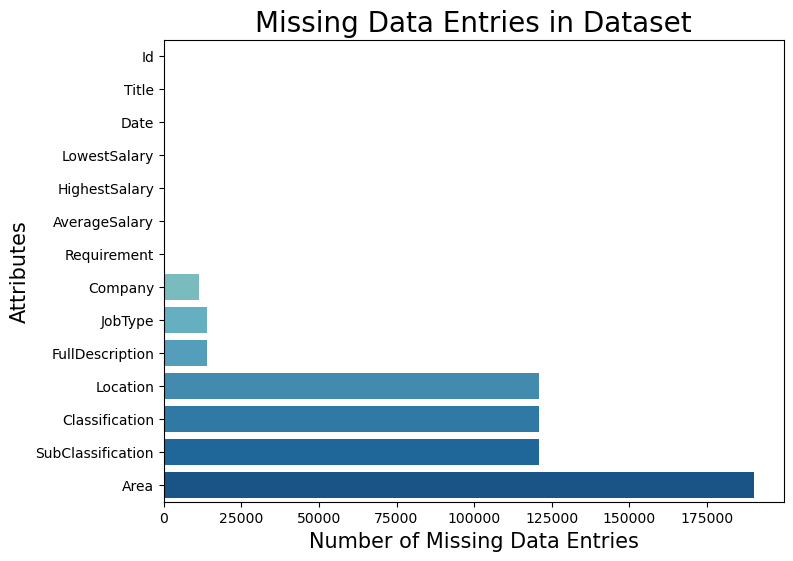

In [16]:
# sets sns style
#sns.set()
#sns.set_style("whitegrid")

# plots NaN value on horizontal bar chart
plt.figure(figsize= (8, 6) )

sns.barplot(data= null_df, y = "Attribute", x = "Missing Values", palette= "GnBu")

# setting label of y-axis
plt.ylabel("Attributes", fontsize = 15)
 
# setting label of x-axis
plt.xlabel("Number of Missing Data Entries", fontsize = 15)

# setting label of Title
plt.title("Missing Data Entries in Dataset", fontsize = 20)

plt.show()

In [17]:
#Save cleaned and preprocessed dataset
#df.to_csv("preprocessed_data.csv")

PART 2: DATA UNDERSTANDING

Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart.

In [18]:
# Count the number of jobs based on "Average salary" range 
avg_sal_df = df.groupby('AverageSalary').size().reset_index(name="TotalJobs")

# Convert 'AverageSalary' values to thousands
avg_sal_df['AverageSalary'] = avg_sal_df['AverageSalary'] * 1000

# Print
avg_sal_df


AverageSalary  TotalJobs
0         15000.0      59585
1         35000.0      22790
2         45000.0      33709
3         55000.0      25178
4         65000.0      26357
5         75000.0      27443
6         90000.0      24199
7        110000.0      26433
8        135000.0      23406
9        175000.0      24558
10       599500.0      10654

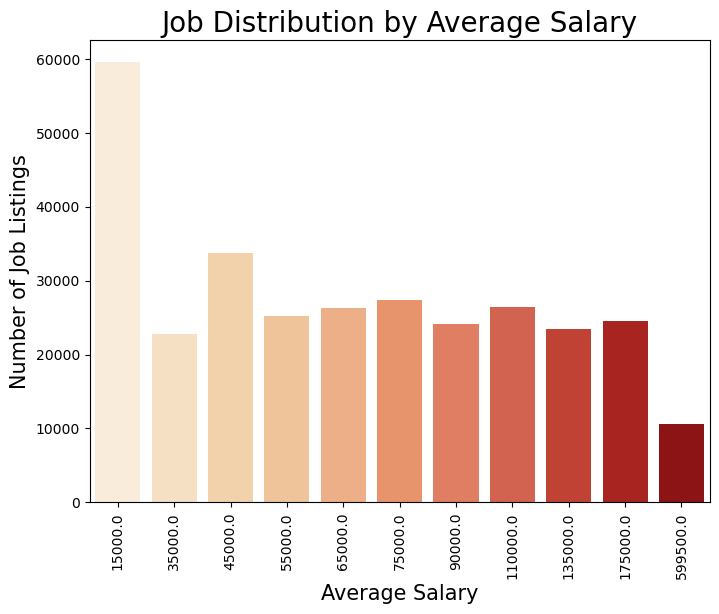

In [19]:
# sets sns style
# sns.set()
# sns.set_style("whitegrid")

# plotting average salary data to bar chart
plt.figure(figsize=(8, 6))

sns.barplot(data = avg_sal_df, x = "AverageSalary", y = "TotalJobs", palette = sns.color_palette("OrRd", n_colors=11))

# setting label of Title
plt.title("Job Distribution by Average Salary", fontsize=20)

# setting label of x-axis
plt.xlabel("Average Salary", fontsize = 15)

# setting label of y-axis
plt.ylabel("Number of Job Listings", fontsize = 15)

plt.xticks(rotation = 90)

plt.show()


Display the list of job types and the number of jobs of each type using pie chart.

In [20]:
# Count number of jobs based on "Job Types" and set the integer row indices
jobtype_df = df.groupby('JobType').size().reset_index(name="TotalJobs")

# Print
jobtype_df

JobType  TotalJobs
0  Casual/Vacation      24408
1    Contract/Temp      51813
2        Full Time     193165
3        Part Time      21024

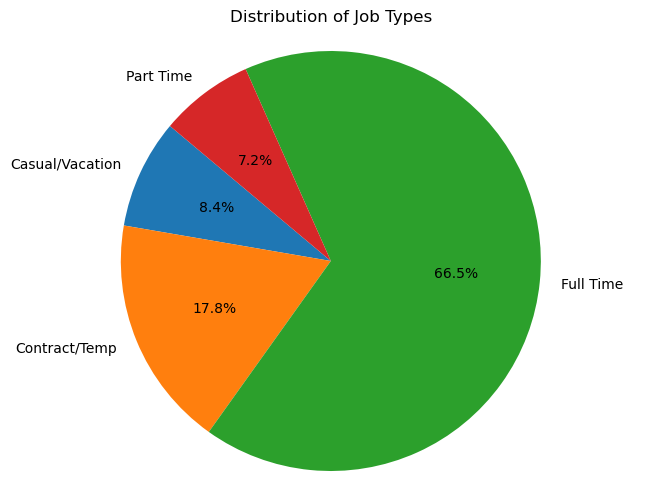

In [21]:
# # plotting job types data to pie chart
plt.figure(figsize=(8, 6))

plt.pie(jobtype_df['TotalJobs'], labels = jobtype_df['JobType'], autopct='%1.1f%%', startangle=140)

# setting label of Title
plt.title('Distribution of Job Types')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal') 

plt.show()

Display the list of job sectors and the number of jobs of each type using horizontal bar chart.

In [22]:
# Count the number of jobs based on "Classification" and set the integer row indices
jobsec_df = df.groupby('Classification').size().reset_index(name="TotalJobs")

# Sor the values
jobsec_df = jobsec_df.sort_values(by="TotalJobs", ascending=False)

# Print
jobsec_df


Classification  TotalJobs
17  Information & Communication Technology      21024
29                       Trades & Services      16885
14                    Healthcare & Medical      15769
15                   Hospitality & Tourism      14360
20    Manufacturing, Transport & Logistics      11569
1          Administration & Office Support       9463
0                               Accounting       8698
10                    Education & Training       8603
7                             Construction       7737
25                                   Sales       7561
24              Retail & Consumer Products       7558
13                    Government & Defence       7108
11                             Engineering       5909
22              Mining, Resources & Energy       5799
3             Banking & Financial Services       4311
6         Community Services & Development       4222
16           Human Resources & Recruitment       3891
19                                   Legal       3835
5           Call Centre & Customer Service       3725
21              Marketing & Communications       3718
23                  Real Estate & Property       3335
9                    Design & Architecture       1679
18              Insurance & Superannuation       1378
8                    Consulting & Strategy       1134
28                      Sport & Recreation        915
26                    Science & Technology        839
12         Farming, Animals & Conservation        821
4                 CEO & General Management        791
2                Advertising, Arts & Media        790
27                         Self Employment         88

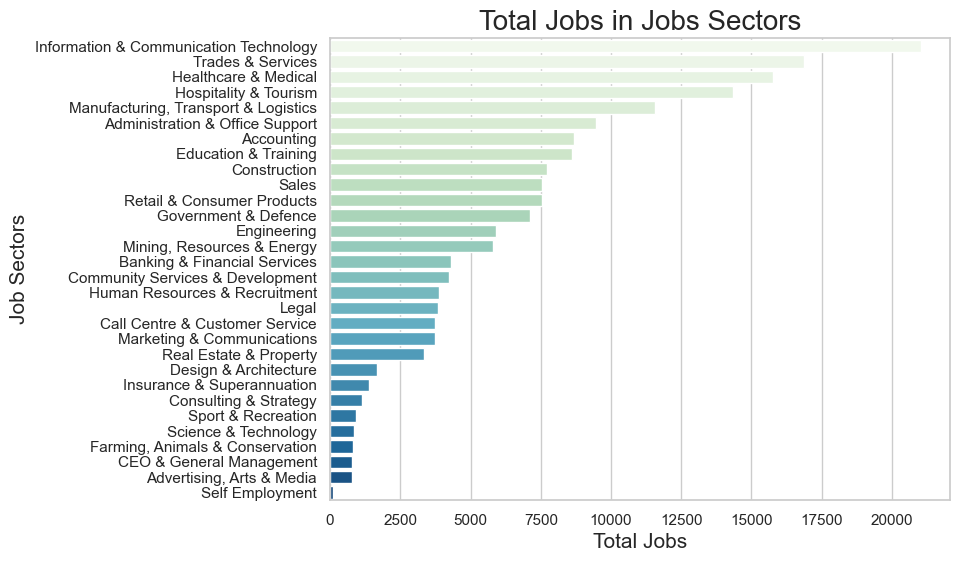

In [23]:
# sets sns style
sns.set()
sns.set_style("whitegrid")

# plots list of job sectors and the number of jobs of each type on horizontal bar chart
plt.figure(figsize= (8, 6) )

sns.barplot(data= jobsec_df, y = "Classification", x = "TotalJobs", palette= "GnBu")

# setting label of y-axis
plt.ylabel("Job Sectors", fontsize = 15)
 
# setting label of x-axis
plt.xlabel("Total Jobs", fontsize = 15)

# setting label of Title
plt.title("Total Jobs in Jobs Sectors", fontsize = 20)

plt.show()

Choose your favorite location. Visualize the market share of that location in pie chart.

In [24]:
# Count the number of jobs in every job sector for "Sydney"
loc_jobsect_df = df[(df["Location"] == 'Sydney')].groupby("Classification").size().reset_index(name="TotalJobs")

# Sort the count
loc_jobsect_df = loc_jobsect_df.sort_values(by="TotalJobs", ascending=False)

# Select the first 10 sectors
top_10_sectors = loc_jobsect_df[:10]

# Create sector 'other' to hold the number of job postings for every other sector to reduce the number of sectors(rows)
new_row_df = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'TotalJobs' : [loc_jobsect_df["TotalJobs"][10:].sum()]
})

# Combine the both data frames
loc_jobsect_df = pd.concat([top_10_sectors, new_row_df])

# Print
loc_jobsect_df

Classification  TotalJobs
17  Information & Communication Technology       8829
29                       Trades & Services       3777
15                   Hospitality & Tourism       3766
0                               Accounting       3759
14                    Healthcare & Medical       3112
20    Manufacturing, Transport & Logistics       3068
1          Administration & Office Support       3031
25                                   Sales       2937
7                             Construction       2691
3             Banking & Financial Services       2380
0                                   Others      19246

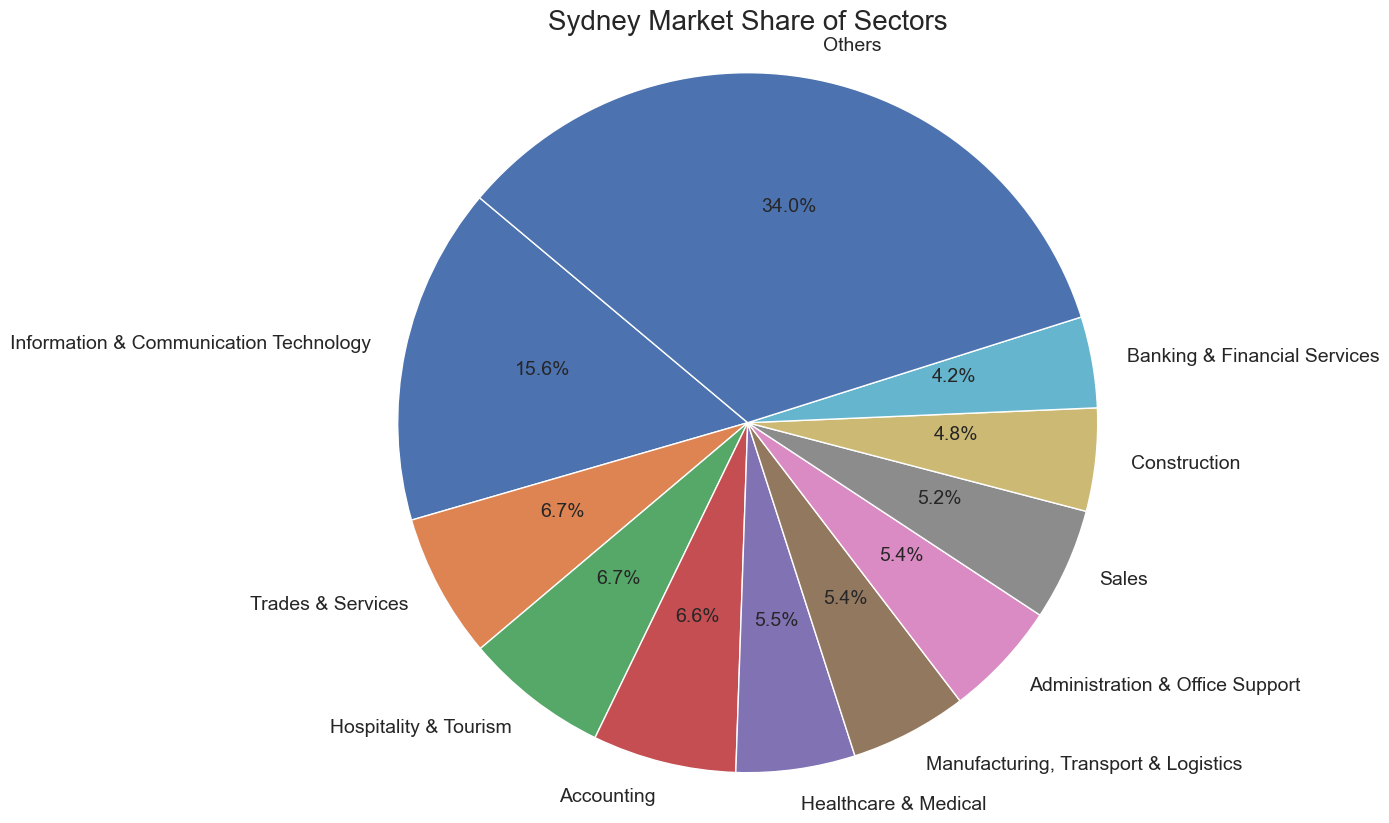

In [25]:
# plots list of job sectors and the number of job postings in "Sydney" on pie chart
plt.figure(figsize=(12, 10))

plt.pie(loc_jobsect_df['TotalJobs'], labels=loc_jobsect_df['Classification'], autopct='%1.1f%%\n', startangle=140, labeldistance=1.1, textprops={'fontsize': 14})

# setting label of Title
plt.title("Sydney Market Share of Sectors", fontsize = 20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal') 

plt.xticks(rotation = 90)

plt.show()

Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart.

In [26]:
# Checks the "Location" column of the DataFrame df for missing values (NaN) and returns a boolean Series. 
# Each element in the Series is True if the corresponding value in the "Location" column is missing, and False if it's 
# not missing.
locationDf = df[df['Location'].isna()==False]

# Count the number of jobs for each location and set the integer row indices
locationDf = locationDf.groupby('Location').size().reset_index(name="TotalJobs")

# Sort the values
locationDf = locationDf.sort_values("TotalJobs", ascending=False)

# Select the first 30 locations
locationDf = locationDf[:30]

# Print
locationDf

Location  TotalJobs
54                                Sydney      56596
36                             Melbourne      43364
10                              Brisbane      19995
43                                 Perth      12187
1                               Adelaide       6156
0                                    ACT       5878
40          Newcastle, Maitland & Hunter       3739
25                            Gold Coast       3338
51                  South West Coast VIC       1678
34                   Mackay & Coalfields       1611
62   Wollongong, Illawarra & South Coast       1552
44      Port Hedland, Karratha & Pilbara       1525
53                        Sunshine Coast       1449
14                    Cairns & Far North       1414
42                          Northern QLD       1378
26               Gosford & Central Coast       1268
56             Toowoomba & Darling Downs       1224
18                                Darwin       1188
28                                Hobart        955
9          Blue Mountains & Central West        883
30    Kalgoorlie, Goldfields & Esperance        810
33             Lismore & Far North Coast        763
8   Bendigo, Goldfields & Macedon Ranges        752
58                Wagga Wagga & Riverina        740
38     Mornington Peninsula & Bass Coast        685
48         Rockhampton & Capricorn Coast        679
24               Gladstone & Central QLD        658
20                   Dubbo & Central NSW        604
12                  Bunbury & South West        580
7           Ballarat & Central Highlands        570

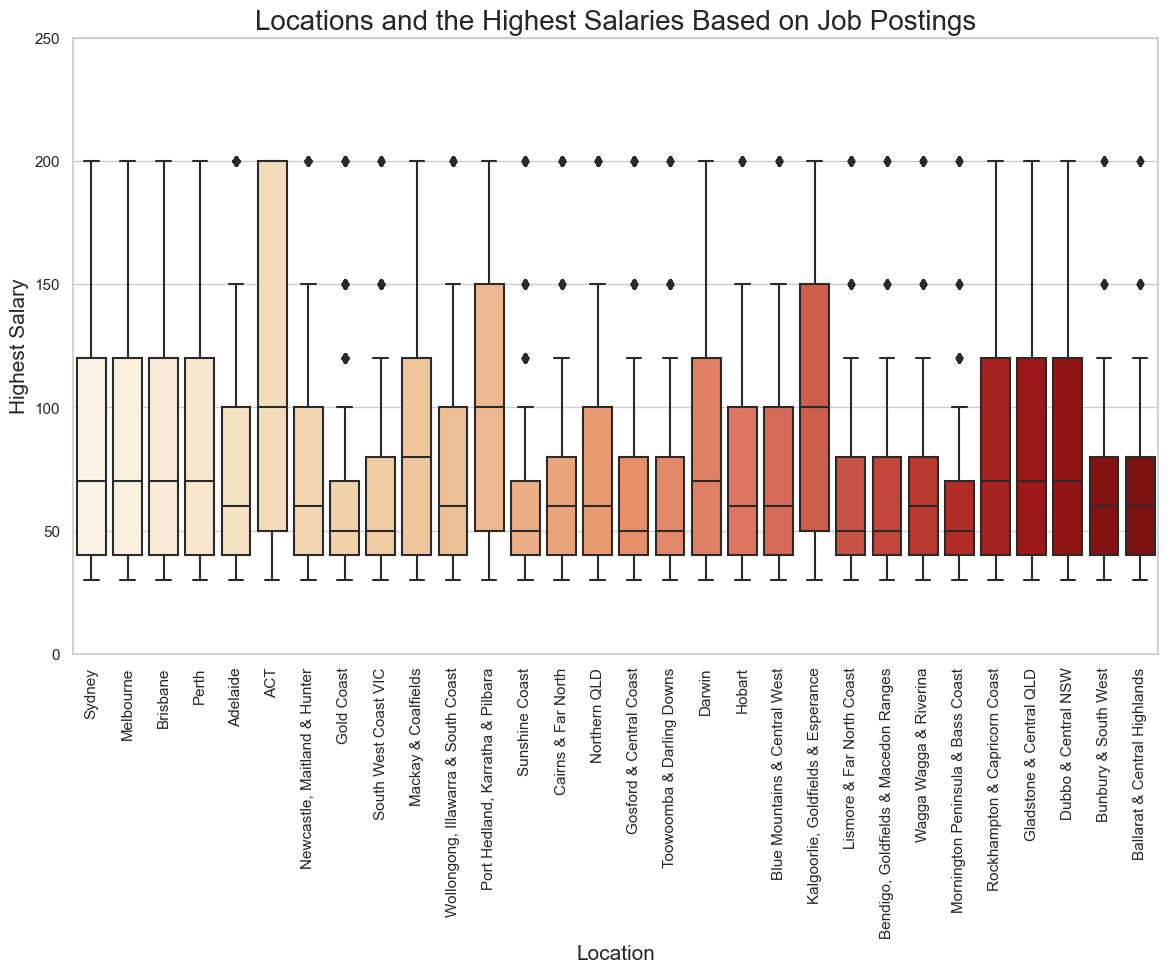

In [27]:
# plots the box plot for list of locations and the highest salary where the locations are selected based on number of job postings
plt.figure(figsize=(14, 8))

# Data is the actual data frame (df) and locations are based on number of jobs
sns.boxplot(
    data=df,
    x="Location",
    y="HighestSalary",
    order=locationDf["Location"][:30],
    palette=sns.color_palette("OrRd", n_colors=30)
)

# setting label of title
plt.title("Locations and the Highest Salaries Based on Job Postings", fontsize = 20)

plt.xticks(rotation=90)

# setting label of y-axis
plt.ylabel("Highest Salary", fontsize = 15)

# setting label of x-axis
plt.xlabel("Location", fontsize = 15)

# set the limits for the y-axis of a plot to control the range of values displayed on the y-axis
plt.ylim(ymax= 250, ymin=0)

plt.show()

PART 3: DATA ANALYSIS AND VISUALIZATION

Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [28]:
# Selected two cities for comparison analysis
selected_locations = ['Sydney', 'Melbourne']

# Created a data frame with two cities data
syd_melb_df = df[df['Location'].isin(selected_locations)]

# Count the number of jobs and set the integer row indices to answer first part of the question
city_df = syd_melb_df.groupby('Location').size().reset_index(name="TotalJobs")

# Count the number of jobs and set the integer row of indices based on cities and job types for second part
syd_melb_df = syd_melb_df.groupby(['Location', 'JobType']).size().reset_index(name="TotalJobs")

# Print
print('which city has more jobs', city_df)

# Print
syd_melb_df 


which city has more jobs     Location  TotalJobs
0  Melbourne      43364
1     Sydney      56596


Location          JobType  TotalJobs
0  Melbourne  Casual/Vacation       3237
1  Melbourne    Contract/Temp       6765
2  Melbourne        Full Time      27763
3  Melbourne        Part Time       3272
4     Sydney  Casual/Vacation       2854
5     Sydney    Contract/Temp      10331
6     Sydney        Full Time      38108
7     Sydney        Part Time       2678

In each city, which are top 5 job sectors? How many jobs are there in each sector?

In [29]:
# Count the number of jobs and set the integer row indices for "Sydney" based on job sectors
syd_jobsect_df = df[(df["Location"] == 'Sydney')].groupby("Classification").size().reset_index(name="TotalJobs")

syd_jobsect_df = syd_jobsect_df.sort_values(by="TotalJobs", ascending=False)

syd_jobsect_df = syd_jobsect_df[:5]

syd_jobsect_df


# Count the number of jobs and set the integer row indices for "Melbourne" based on job sectors
mel_jobsect_df = df[(df["Location"] == 'Melbourne')].groupby("Classification").size().reset_index(name="TotalJobs")

mel_jobsect_df = mel_jobsect_df.sort_values(by="TotalJobs", ascending=False)

mel_jobsect_df = mel_jobsect_df[:5]

print('Sydney', syd_jobsect_df) 

print()

print('Melbourne', mel_jobsect_df) 

Sydney                             Classification  TotalJobs
17  Information & Communication Technology       8829
29                       Trades & Services       3777
15                   Hospitality & Tourism       3766
0                               Accounting       3759
14                    Healthcare & Medical       3112

Melbourne                             Classification  TotalJobs
17  Information & Communication Technology       5399
15                   Hospitality & Tourism       3739
29                       Trades & Services       3600
20    Manufacturing, Transport & Logistics       3303
14                    Healthcare & Medical       3229


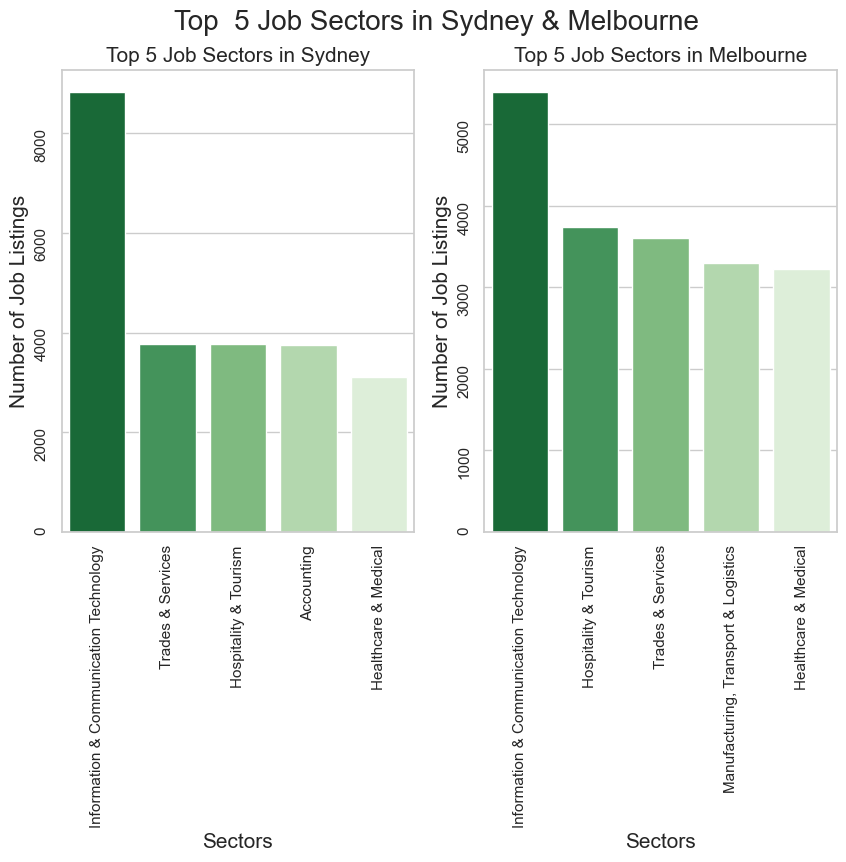

In [33]:
# plotting top 5 job sectors per city
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Top  5 Job Sectors in Sydney & Melbourne", fontsize = 20)

# plot for top 5 sydney sectors
ax[0] = sns.barplot(data = syd_jobsect_df, 
            x = syd_jobsect_df["Classification"][:5],
            y = "TotalJobs",
            palette="Greens_r", 
            ax = ax[0]
            )
ax[0].set_xlabel("Sectors", fontsize = 15)
ax[0].set_ylabel("Number of Job Listings", fontsize = 15)
ax[0].set_title("Top 5 Job Sectors in Sydney", fontsize = 15)
ax[0].tick_params(labelrotation = 90)


# plot for top 5 melbourne sectors
ax[1] = sns.barplot(data = mel_jobsect_df, 
            x = mel_jobsect_df["Classification"][:5],
            y = "TotalJobs",
            palette="Greens_r",
            ax = ax[1]
            )
ax[1].set_xlabel("Sectors", fontsize = 15)
ax[1].set_ylabel("Number of Job Listings", fontsize = 15)
ax[1].set_title("Top 5 Job Sectors in Melbourne", fontsize = 15)
ax[1].tick_params(labelrotation = 90)

Visualise the top 5 job sectors in pie chart for each city

In [36]:
# piechart subplot of top 5 job sectors in melbourne & sydney 
fig = plt.figure(figsize=(15,10), dpi=1600)

# piechart for Sydney
ax1 = plt.subplot2grid((1, 2),(0,0))

plt.pie(
    syd_jobsect_df['TotalJobs'][:5],
    labels = syd_jobsect_df["Classification"][:5],
    colors = sns.color_palette("Greens", n_colors=5),
    autopct = "%.1f%%",
    textprops={'fontsize': 10}
)

plt.title("Top 5 Job Sectors in Sydney", fontsize = 15)

# piechart for Melbourne
ax1 = plt.subplot2grid((1, 2), (0, 1))

plt.pie(
    mel_jobsect_df['TotalJobs'][:5],
    labels = mel_jobsect_df["Classification"][:5],
    colors = sns.color_palette("Greens", n_colors=5),
    autopct = "%.1f%%",
    textprops = {'fontsize': 10},
    startangle = 30    
)

plt.title("Top 5 Job Sectors in Melbourne", fontsize = 15)

plt.show()

In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

In [37]:
# Count the number of jobs and set the integer row indices for "Sydney" based on highest salary
syd_range_df = df[(df["Location"] == 'Sydney')].groupby("HighestSalary").size().reset_index(name="TotalJobs")

# Count the number of jobs and set the integer row indices for "Melbourne" based on highest salary
mel_range_df = df[(df["Location"] == 'Melbourne')].groupby("HighestSalary").size().reset_index(name="TotalJobs")

print('Sydney', syd_range_df) 

print()

print('Melbourne', mel_range_df) 

Sydney     HighestSalary  TotalJobs
0              30      10834
1              40       3806
2              50       5208
3              60       4375
4              70       4682
5              80       4709
6             100       3726
7             120       5190
8             150       5326
9             200       5818
10            999       2922

Melbourne     HighestSalary  TotalJobs
0              30       8844
1              40       3928
2              50       4734
3              60       3514
4              70       3740
5              80       3795
6             100       3072
7             120       3896
8             150       3124
9             200       3149
10            999       1568


List top 5 companies in each city? Which sectors do they belong to?

In [38]:
# Count the number of jobs and set the integer row indices for "Sydney" based on companies and job sectors
top_syd_df = df[(df["Location"] == 'Sydney')].groupby(["Company","Classification"]).size().reset_index(name="TotalJobs")

top_syd_df = top_syd_df.sort_values("TotalJobs", ascending=False)

top_syd_df = top_syd_df[:5]

# Count the number of jobs and set the integer row indices for "Melbourne" based on companies and job sectors
top_mel_df = df[(df["Location"] == 'Melbourne')].groupby(["Company","Classification"]).size().reset_index(name="TotalJobs")

top_mel_df = top_mel_df.sort_values("TotalJobs", ascending=False)

top_mel_df = top_mel_df[:5]

from tabulate import tabulate

print("Sydney Data:")

# Print in tabular form
print(tabulate(top_syd_df, headers='keys', tablefmt='pretty'))

# Print Melbourne DataFrame
print("\nMelbourne Data:")

print(tabulate(top_mel_df, headers='keys', tablefmt='pretty'))

Sydney Data:
+-------+-----------------------------------------+----------------------------------------+-----------+
|       |                 Company                 |             Classification             | TotalJobs |
+-------+-----------------------------------------+----------------------------------------+-----------+
| 7457  |               Jora Local                |         Hospitality & Tourism          |   1733    |
| 10513 |                  Paxus                  | Information & Communication Technology |    310    |
| 4337  |             Design & Build              |              Construction              |    297    |
| 6396  |       Hays Accountancy & Finance        |               Accounting               |    277    |
| 6012  | Gough Property & Real Estate Recruiters |         Real Estate & Property         |    247    |
+-------+-----------------------------------------+----------------------------------------+-----------+

Melbourne Data:
+-------+----------------

Between 2 cities, which do you think it is better for employees. Explain your choice.

Sydney seems to be the better choice betweem the 2 cities in terms of employability, particularly for full-time work. While Melbourne has more part-time & casual work, Sydney has more jobs available in all salary ranges, as well as more job listings.

ANALYSIS BY TIME

Visualise the number of job posts by month

In [39]:
# Count the number of jobs and set the integer row indices based on "Date". (need to fix the months order)
#result_months = df.groupby(df['Date'].dt.strftime('%B')).size().reset_index(name='TotalCount')
result_months = df.groupby(df['Date'].dt.month_name()).size().reset_index(name='TotalCount')

# Print
result_months

Date  TotalCount
0  December       57795
1  February       22002
2   January       69366
3     March         402
4  November       40965
5   October      113782

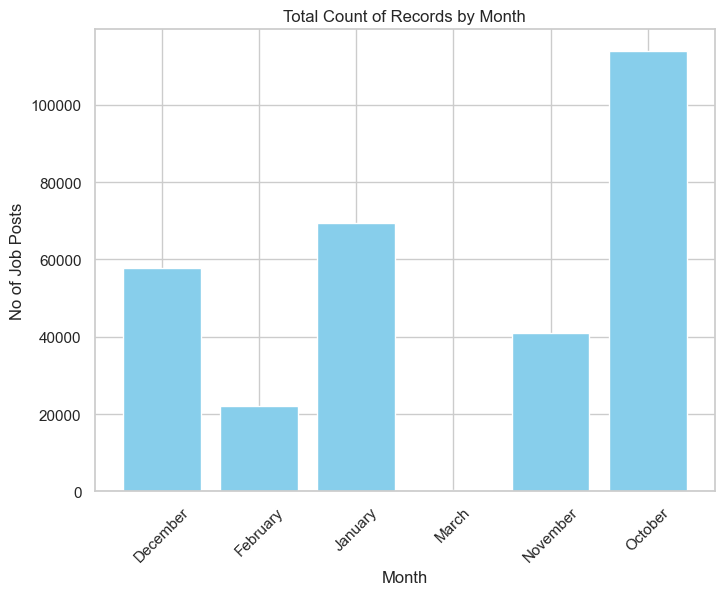

In [40]:
# Create a bar chart
plt.figure(figsize=(8, 6))

plt.bar(result_months['Date'], result_months['TotalCount'], color='skyblue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('No of Job Posts')
plt.title('Total Count of Records by Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

Visualise the number of job posts by day of week.

In [41]:
# Define a custom sorting order for days of the week
day_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of the week and count
day_of_week = df.groupby(df['Date'].dt.strftime('%A')).size().reset_index(name='TotalCount')

# Convert the 'Date' column to categorical with the custom sorting order
day_of_week['Date'] = pd.Categorical(day_of_week['Date'], categories=day_order, ordered=True)

# Sort the DataFrame by the categorical 'Date' column
day_of_week.sort_values('Date', inplace=True)

day_of_week

Date  TotalCount
1     Monday       51508
5    Tuesday       55632
6  Wednesday       64773
4   Thursday       56570
0     Friday       56261
2   Saturday        7798
3     Sunday       11770

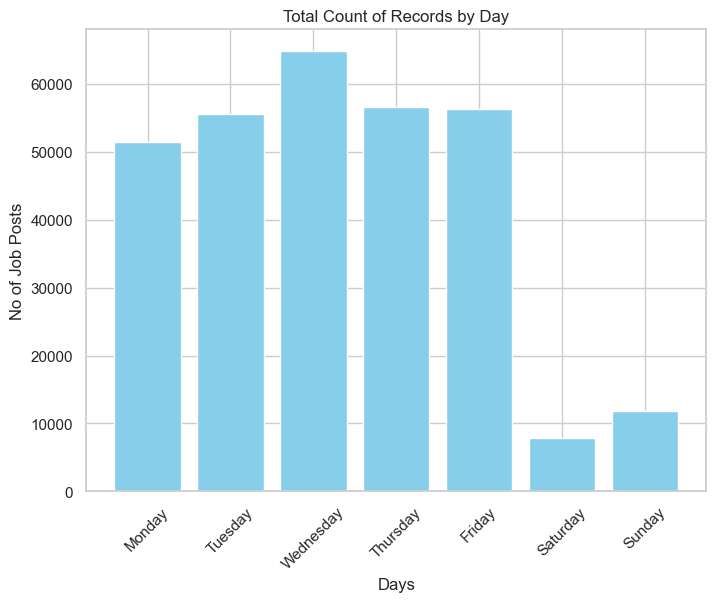

In [42]:
# Create a bar chart
plt.figure(figsize=(8, 6))
           
plt.bar(day_of_week['Date'], day_of_week['TotalCount'], color='skyblue')

# Set labels and title
plt.xlabel('Days')
plt.ylabel('No of Job Posts')
plt.title('Total Count of Records by Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

Visualise the number of job posts by day of the month

In [43]:
day_of_month = df.groupby(df['Date'].dt.strftime('%d')).size().reset_index(name='TotalCount')

day_of_month

Date  TotalCount
0    01        4362
1    02        9657
2    03       12162
3    04       16680
4    05       15022
5    06        6942
6    07       11134
7    08        9243
8    09       15767
9    10       19703
10   11       13170
11   12       15836
12   13       12350
13   14        9360
14   15        9447
15   16        7578
16   17       15535
17   18       16146
18   19        8716
19   20        8885
20   21       13650
21   22       10948
22   23        1760
23   24        2531
24   25        2015
25   26        2819
26   27        3544
27   28        3214
28   29        5925
29   30        9580
30   31       10631

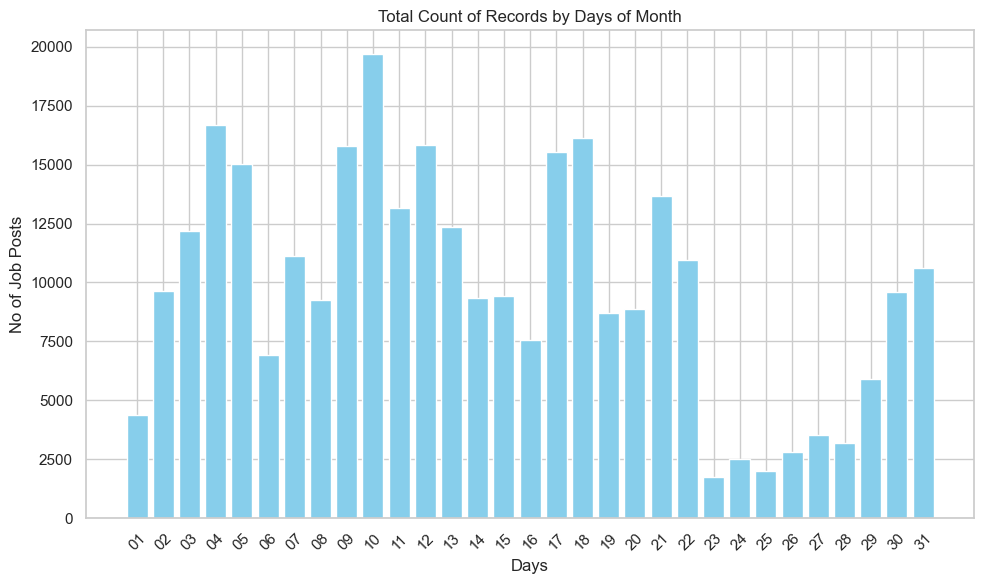

In [44]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(day_of_month['Date'], day_of_month['TotalCount'], color='skyblue')

# Set labels and title
plt.xlabel('Days')
plt.ylabel('No of Job Posts')
plt.title('Total Count of Records by Days of Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

Visualise trending of the job postings for the big cities

In [45]:
# Create a new DataFrame `big_city_df`
big_city_df = pd.DataFrame(df, columns=['Location', 'Title', 'Date'])

# Define a list of cities
list_city = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

# Initialize an empty list to store results
result_list = []

# Iterate through the list of cities
for city in list_city:
    # Filter the DataFrame for the current city
    city_data = big_city_df[big_city_df["Location"] == city]
    
    # Group and count data by 'Location' and 'Date'
    data_group = city_data.groupby(['Location', 'Date']).count().reset_index().sort_values(by=['Date'])
    
    # Set the 'Date' column as the index
    data_group.set_index('Date', inplace=True)
    
    # Rename the 'Title' column to 'Count'
    data_group = data_group['Title'].rename('Count')
    
    # Append the 'Count' data for the current city to the result list
    result_list.append(data_group)



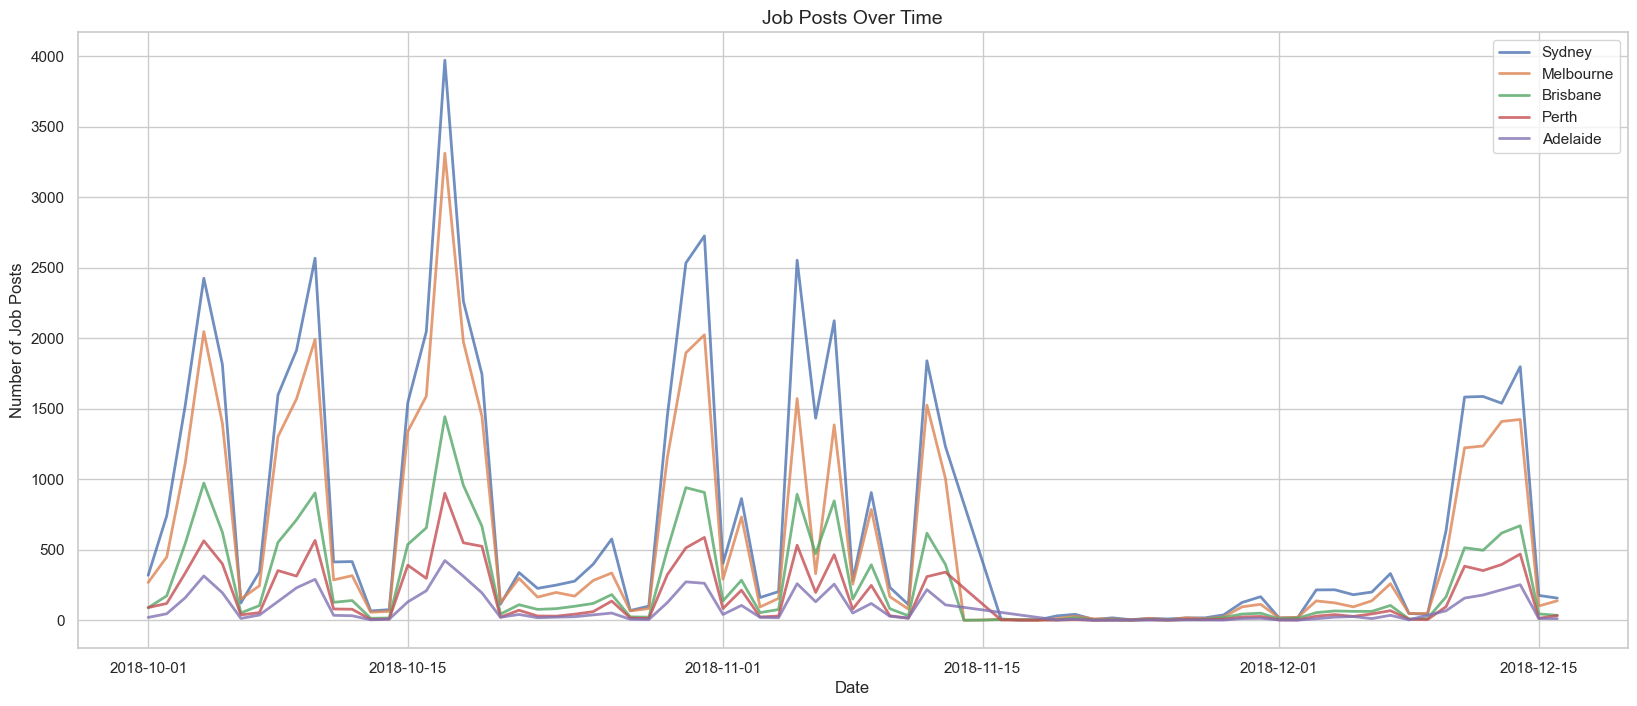

In [46]:

# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate through each city in the list
for i, city in enumerate(list_city):
    # Plot the data from result_list for the current city
    plt.plot(result_list[i], alpha=0.8, lw=2)

# Add a legend with city names
plt.legend(list_city, frameon=True)

# Set the chart title
plt.title('Job Posts Over Time', size=14)

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Number of Job Posts')

# Display the chart
plt.show()


Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

Based on the above observations, job postings seem to be concentrated within the first 2/3rds of the month. There is a sharp decline on the 23rd which gradually picks up on the 30th.

Job postings largely seem to occur on weekdays, with only minimal postings in comparison occuring on Saturday and Sunday.

There is a large gap in data during the period from April-July. While there is a slim chance that there was in fact no listings during this time, it would be more likely to assume that the dataset is incomplete and doesn't include data from this time period.

Job postings within the 5 major cities (Sydney, Melbourne, Brisbane, Perth & Adelaide) seem to follow similar trends, with peaks and troughs of job postings occuring largely in unison.

Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart.
Which one creates a better prediction? Explain your choice.

In [48]:
# Create a new DataFrame `mv_df`
mv_df = pd.DataFrame(df, columns=['Location', 'Title', 'Date'])

# Define a list of cities
list_city = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

# Filter `mv_df` to include only rows with cities from `list_city`
city_data = mv_df[(mv_df["Location"].isin(list_city))]

# Group and count data by 'Location' and 'Date'
data_group = city_data.groupby(['Location', 'Date']).count().reset_index().sort_values(by=['Date'])

# Set the 'Date' column as the index
data_group.set_index('Date', inplace=True)

# Rename the 'Title' column to 'Count'
data_group = data_group['Title'].rename('Count')

# Generate a rolling moving average over a weekly interval (7 days) with a minimum of 5 data points
moving_average_week = data_group.rolling(7, min_periods=5)

# Generate a rolling moving average over a monthly interval (30 days) with no minimum data point requirement
moving_average_month = data_group.rolling(30, min_periods=0)


Text(0, 0.5, 'Number of Job Posts')

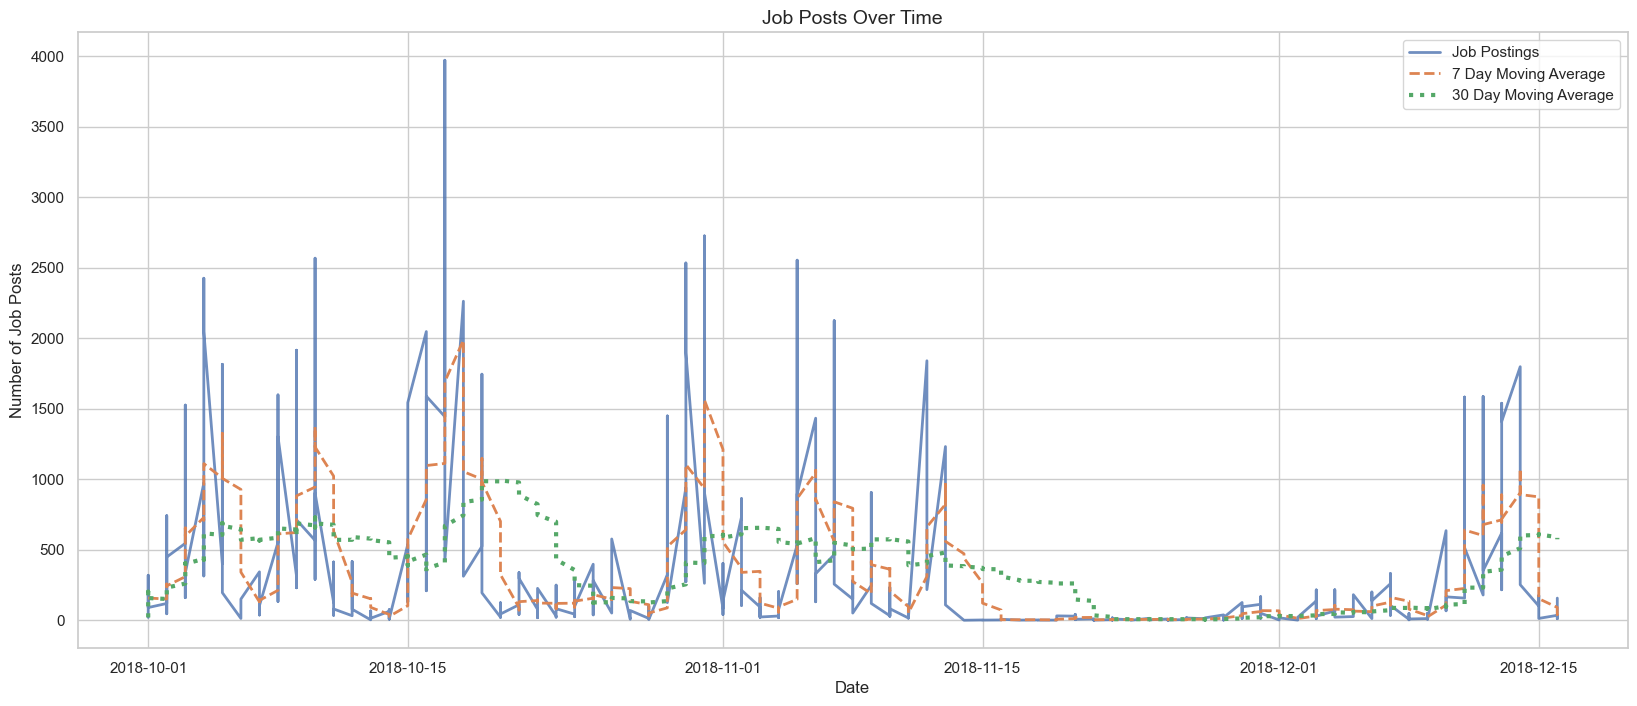

In [49]:
# Create a new DataFrame `plot_df` with columns for 'Count', '7 Day Moving Average', and '30 Day Moving Average'
plot_df = pd.DataFrame({'Count': data_group, '7 Day Moving Average': moving_average_week.mean(),
                        '30 Day Moving Average': moving_average_month.mean()})

# Create a figure for the plot with a specified size
plt.figure(figsize=(20, 8))

# Plot the 'Count' data as a solid line with alpha transparency and line width
plt.plot(plot_df['Count'], alpha=0.8, lw=2)

# Plot the '7 Day Moving Average' data as a dashed line with line width
plt.plot(plot_df['7 Day Moving Average'], linestyle='--', lw=2)

# Plot the '30 Day Moving Average' data as a dotted line with thicker line width
plt.plot(plot_df['30 Day Moving Average'], linestyle='dotted', lw=3)

# Add a legend to the plot
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)

# Set the title of the chart
plt.title('Job Posts Over Time', size=14)

# Set the label for the x-axis
plt.xlabel('Date')

# Set the label for the y-axis
plt.ylabel('Number of Job Posts')


Both type of predictions have their own benefits such as 7 - day moving average provides short term view on the data and represents variations which are express in nature. On the other hand, 30 - day moving average provides long term view on the data and represents variations which are smooth in nature. We are predicting about the job postings that is why my preference would be 7-day moving average becasue job market is very competitive and change rapidly, for that reason its more preferable to depend on 7-day moving average.